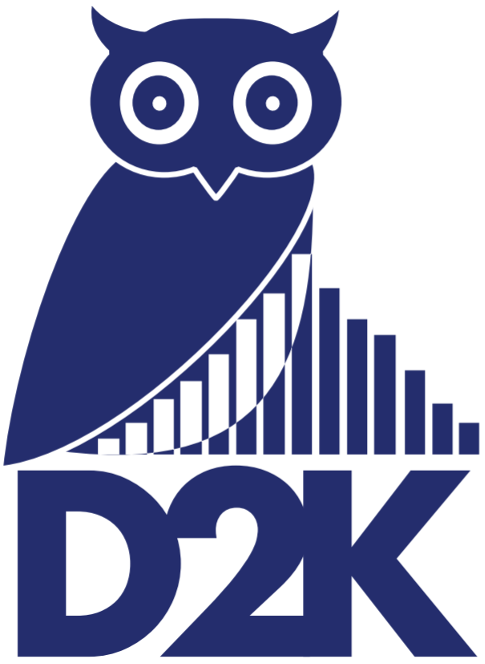 

<center>

# Welcome to COMP 680 #
### Statistics for Computing and Data Science ###

### Homework 3 ###

In [44]:
### standard imports
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline  
plt.style.use('fivethirtyeight')
plt.rcParams["patch.force_edgecolor"] = True
import seaborn as sns

import random
# fix random seed for reproducibility
random.seed = 2023

##  HW Questions Start Here

For Question 1 - 5, you will work with US Census Data (Did you fill out 2020 Census?)

Read the US Census Data set `nc-est2020-agesex-res.csv` information [here](https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.pdf), make sure you understand the data fully, what is each row and each column etc.

First, let's read in the data, save as a dataframe and select some useful columns:

In [45]:
full = pd.read_csv('nc-est2020-agesex-res.csv')
full

SEX  AGE  CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
0      0    0        3944153            3944160          3951495   
1      0    1        3978070            3978090          3957904   
2      0    2        4096929            4096939          4090799   
3      0    3        4119040            4119051          4111869   
4      0    4        4063170            4063186          4077511   
..   ...  ...            ...                ...              ...   
301    2   97          53582              53605            54166   
302    2   98          36641              36675            37567   
303    2   99          26193              26214            26098   
304    2  100          44202              44246            45079   
305    2  999      156964212          156969328        157249665   

     POPESTIMATE2011  POPESTIMATE2012  POPESTIMATE2013  POPESTIMATE2014  \
0            3963264          3926731          3931411          3954973   
1            3966768          3978210          3943348          3949559   
2            3971498          3980139          3993047          3960015   
3            4102429          3983007          3992839          4007852   
4            4122252          4112849          3994539          4006407   
..               ...              ...              ...              ...   
301            57127            59226            60675            62415   
302            40081            42573            43869            45899   
303            26997            29078            30681            32247   
304            47430            50051            52831            57125   
305        158370501        159480635        160545893        161690519   

     POPESTIMATE2015  POPESTIMATE2016  POPESTIMATE2017  POPESTIMATE2018  \
0            3984144          3963268          3882437          3826908   
1            3973828          4003586          3981864          3897917   
2            3967672          3992657          4021261          3996742   
3            3976277          3984985          4009060          4035053   
4            4022785          3992241          4000394          4021907   
..               ...              ...              ...              ...   
301            68627            69729            76313            82046   
302            46622            52146            53004            57386   
303            33567            34289            38508            39398   
304            60327            64400            67129            72068   
305        162832151        163986062        165008683        165877686   

     POPESTIMATE2019  POPESTIMATE2020  
0            3762227          3735010  
1            3842257          3773884  
2            3911822          3853025  
3            4009037          3921526  
4            4045996          4017847  
..               ...              ...  
301            84349            85452  
302            62429            62702  
303            42288            45572  
304            76911            79772  
305        166637617        167227921  

[306 rows x 15 columns]

From the full dataset, let's take out 4 columns of insterest: SEX, AGE, POPESTIMATE2010 and POPESTIMATE2020. Let's also rename the two columns with simple names '2010' and '2020':

In [46]:
partial = full[[ 'SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2020']]
partial.rename(columns={'POPESTIMATE2010': '2010', 'POPESTIMATE2020':'2020'}, inplace=True)
partial.head()

/Users/su/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


SEX  AGE     2010     2020
0    0    0  3951495  3735010
1    0    1  3957904  3773884
2    0    2  4090799  3853025
3    0    3  4111869  3921526
4    0    4  4077511  4017847

**Question 1** Let's exclude age 999 and save the table as `no_999`. (why do we want to exclude it?)

In [47]:
no_999 = partial[partial['AGE'] < 999]
no_999

SEX  AGE     2010     2020
0      0    0  3951495  3735010
1      0    1  3957904  3773884
2      0    2  4090799  3853025
3      0    3  4111869  3921526
4      0    4  4077511  4017847
..   ...  ...      ...      ...
300    2   96    75199   114037
301    2   97    54166    85452
302    2   98    37567    62702
303    2   99    26098    45572
304    2  100    45079    79772

[303 rows x 4 columns]

In [48]:
# this one works too
drop_index = partial[partial['AGE'] == 999].index
no_999 = partial.drop(index = drop_index)
no_999

SEX  AGE     2010     2020
0      0    0  3951495  3735010
1      0    1  3957904  3773884
2      0    2  4090799  3853025
3      0    3  4111869  3921526
4      0    4  4077511  4017847
..   ...  ...      ...      ...
300    2   96    75199   114037
301    2   97    54166    85452
302    2   98    37567    62702
303    2   99    26098    45572
304    2  100    45079    79772

[303 rows x 4 columns]

**Question 2** Create one dataframe with 3 columns: Age, Male, Female, where Age should be 0 to 100, and Male and Female columns should have 2020 population of male and female for that age. Your dataframe should have 101 rows.

**Hint**: First create seperate dataframes for male and female then combine. You want to use df.reset_index(drop=True), otherwise index will be matched when combining and creating lots of `NaNs`.

In [49]:
male = no_999[no_999['SEX']==1].reset_index(drop=True)
female = no_999[no_999['SEX'] == 2].reset_index(drop=True)

In [50]:
pop_2020 = pd.DataFrame({'Age': male['AGE'], 'Males': male['2020'], 'Females': female['2020']})
pop_2020.head()

Age    Males  Females
0    0  1908141  1826869
1    1  1926654  1847230
2    2  1968545  1884480
3    3  2004835  1916691
4    4  2052982  1964865

**Question 3**: Use visualization to show the population of male and female change over age: create two lines on the same plot to show population over age.

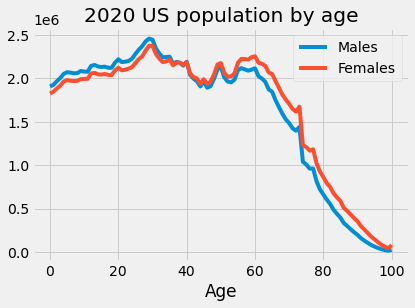

In [51]:
pop_2020[['Age', 'Males', 'Females']].plot(x='Age')
plt.title('2020 US population by age');

**Question 4** Add one column to your above dataframe call it `Percent Female`, and the value should be the percentage of female population as total for each age. 
- Use visualization to show change of percentage of female with age. What do you see?

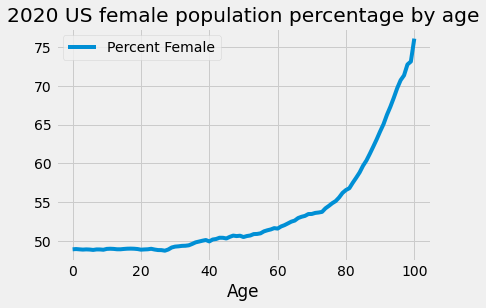

In [52]:
percent_females = 100 * pop_2020['Females']/(pop_2020['Males'] + pop_2020['Females'])
pop_2020['Percent Female'] = percent_females
pop_2020.plot(x='Age', y='Percent Female')
plt.title('2020 US female population percentage by age');

**Question 5**: Suppose population increase at a constant rage g each year, that is pop2021 = pop2020*(1+g). Use this assumption to calculate growth rage g from 2010 to 2019 for EACH age. Add to this column `Growth Rate` to the following dataframe `everyone`.

- Visualize the change of grouth rate ove age. What do you observe?

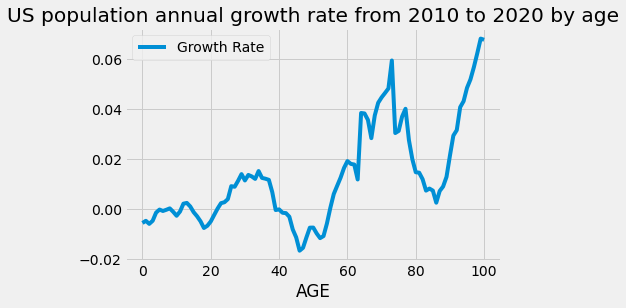

In [53]:
everyone = no_999.loc[no_999['SEX']==0].drop(columns='SEX')
everyone['Growth Rate'] = (everyone['2020']/everyone['2010']) ** (1/10) - 1
everyone.plot(x='AGE', y='Growth Rate')
plt.title('US population annual growth rate from 2010 to 2020 by age');

**Grading Notes:** Q1 - Q5, 10 pts each. Full credit as long as output is correct. 
- if left blank, take off 10 pts.
- if output is incorrect, take off 5 pts.  
- for Q4 and Q5, no need to grade the questions "What do you see?" and "What do you observe?"

**Question 6**: Suppose the population distribution is throwing a fair die, which is a discrete uniform distribution. Complete the following simulation to show that Central Limit Theorem (CLT) still holds, i.e., show that sample mean is approximately normal for large sample size. However, sample median is not normal for large sample size, i.e., CLT only applies to sample mean. 

In [54]:
die = pd.DataFrame({'face': np.arange(1, 7)})
die

face
0     1
1     2
2     3
3     4
4     5
5     6

In [55]:
pop_mean = np.mean(die['face'])
pop_median = np.median(die['face'])
pop_sd = np.std(die['face'])
[pop_mean, pop_median, pop_sd]

[3.5, 3.5, 1.707825127659933]

In [56]:
def sample_mean(sample_size):
    """
    function to simulate a sample mean
    sample_size is the sample size
    returns one sample mean
    """
    return np.mean(die.sample(sample_size, replace=True)['face'])

In [57]:
# try out the function
sample_mean(100)

3.57

In [58]:
def sample_median(sample_size):
    """
    function to simulate a sample median
    sample_size is the sample size
    returns one sample median
    """
    return np.median(die.sample(sample_size, replace=True)['face'])

In [59]:
# try out the function
sample_median(100)

4.0

In [60]:
def simu_stat(stat, sample_size, rep):
    """
    function to simulate a particular statistics multiple times
    stat is the function to calculate the statistic
    sample_size is the sample size
    rep is number of samples to draw
    returns list of simulated stats
    """
    boot_stats = []
    for i in np.arange(rep):
        boot_stats = np.append(boot_stats, stat(sample_size))
    return boot_stats

In [61]:
# try out the function
simu_stat(sample_mean, 100, 10)

array([3.48, 3.77, 3.35, 3.41, 3.52, 3.55, 3.35, 3.66, 3.28, 3.46])

Sample size:  1000
Population mean: 3.5
Average of sample means:  3.5006808000000005
Population SD: 1.707825127659933
SD of sample means: 0.054348036867581516
SD by CLT: 0.05400617248673217


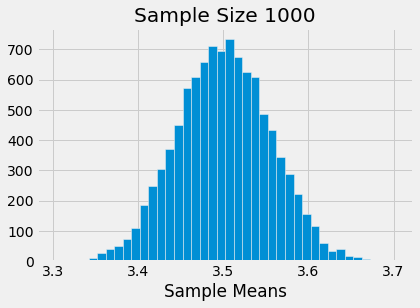

In [62]:
# simulate sample mean
# change the sample size n here to see different simulation results
sample_size = 1000
rep = 10000
stat = sample_mean
# call the function simu_stat
sample_means = simu_stat(stat, sample_size, rep)
plt.hist(sample_means, bins=40)
plt.xlabel('Sample Means')
plt.title('Sample Size ' + str(sample_size))
print("Sample size: ", sample_size)
print("Population mean:", pop_mean)
print("Average of sample means: ", np.mean(sample_means))
print("Population SD:", pop_sd)
print("SD of sample means:", np.std(sample_means))
print("SD by CLT:", pop_sd / np.sqrt(sample_size))

Sample size:  1000
Population median: 3.5
Average of sample median:  3.49765
Population SD: 1.707825127659933
SD of sample median: 0.4940844841724945
SD by CLT: 0.05400617248673217


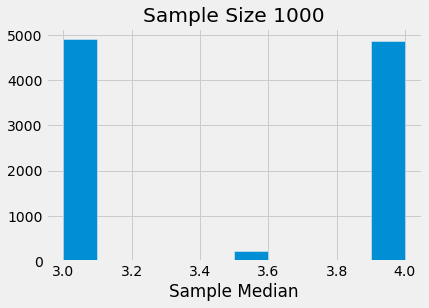

In [63]:
# simulate sample median
# change the sample size n here to see different simulation results
# for a large enough n, say 1000, does the histogram look normal to you?
sample_size = 1000
rep = 10000
stat = sample_median
# call the function simu_stat
sample_medians = simu_stat(stat, sample_size, rep)
plt.hist(sample_medians)
plt.xlabel('Sample Median')
plt.title('Sample Size ' + str(sample_size))
print("Sample size: ", sample_size)
print("Population median:", pop_median)
print("Average of sample median: ", np.mean(sample_medians))
print("Population SD:", pop_sd)
print("SD of sample median:", np.std(sample_medians))
print("SD by CLT:", pop_sd/np.sqrt(sample_size))

**Question 7**:
Let $X_1, \dots, X_n \overset{\text{i.i.d.}} \sim \text{Uniform}[\theta, 1]$ where $\theta$ is the unknown parameter and $0 < \theta < 1$. Find the MLE $\hat{\theta}$.

**Solution**:

The probability density function for each $X_i$ is

$$f(x; \theta) = \begin{cases}
(1 - \theta)^{-1} & \text{if } x \in [\theta, 1] \\
0 & \text{otherwise}
\end{cases}$$

The likelihood function is

$$\mathcal{L}_n(\theta) = \prod_{i=1}^n f(x_i; \theta) = \begin{cases}
(1 - \theta)^{-n} & \text{if } x_i \in [\theta, 1] \text{ for all } x_i\\
0 & \text{otherwise}
\end{cases}
$$
or 
$$\mathcal{L}_n(\theta) = (1 - \theta)^{-n} \prod_{i=1}^n \mathbb{I}_{x_i \in [\theta, 1]}$$

The parameters that maximize the likelihood function make the $\theta$ as large as possible -- that is, we should pick the largest $\theta$ for which the likelihood function is non-zero, i.e., we need $\theta \leq X_i$ for all $X_i$.  So the MLEs are:

$$
\hat{\theta} = \min \{X_1, \dots, X_n \} = X^{(1)}$$

**Grading notes:** 5 pts for the likelihood function, 5 pts for reasoning for the MLE correctly.

**Question 8**:

Let $X_1, X_2, \cdots X_n \sim \text{Uniform}(0, \theta)$. Define the two point estimate:

$$ \hat{\theta}^1 = \max \{X_1, X_2, \cdots X_n\} \quad \hat{\theta}^2 = 2 \bar{X}_n $$ 

Find the mean square error for both $\hat{\theta}^1$ and $\hat{\theta}^2$. Which one has the smaller MSE?

**Hint**: use MSE = $\text{bias}^2$ + variance

**Solution**:

Let $Y = \max \{X_1, X_2, \cdots X_n\} = X^{(n)}$, by transformation of random variables, we can find the cdf and pdf of $Y$:

$$
F_Y(y) = P(Y \leq y) = P(X^{(n)} \leq y) = \prod_{i=1}^n P(X_i \leq y) = \left( \frac{y}{\theta} \right)^n$$

$$
f_Y(y) = \begin{cases}
n \frac{y^{n-1}}{\theta^n}  \quad &0 \leq y < \theta \\
0 \quad &\text{otherwise}\\
\end{cases} 
$$
**Grading notes:** It is ok if they took the pdf of $Y$ directly from lecture notes.

Therefore, we can calculate:
$$\mathbb{E}[\hat{\theta}^1] = \mathbb{E}[Y] = \int_{0}^{\theta} y n \frac{y^{n-1}}{\theta^n} dy = \frac{n}{n+1} \theta$$
$$\text{bias}(\hat{\theta}^1) = \frac{n}{n+1} \theta - \theta = - \frac{1}{n+1} \theta$$ **3 pts**
$$\mathbb{E}[Y^2] = \int_{0}^{\theta} y^2 n \frac{y^{n-1}}{\theta^n} dy = \frac{n}{n+2} \theta^2$$
$$\text{Var}(\hat{\theta}^1) = \text{Var}(Y) = \mathbb{E}[Y^2] - (\mathbb{E}[Y])^2 = \frac{n}{(n+1)^2(n+2)} \theta^2$$ **3 pts**

$$\text{MSE}(\hat{\theta}^1) = \text{bias}^2(\hat{\theta}^1) + \text{Var}(\hat{\theta}^1) = \frac{2}{(n+1)(n+2)} \theta^2$$

For $\hat{\theta}^2$ we can direct use results of $\bar{X}_n$:
$$\text{MSE}(\hat{\theta}^2) = \text{bias}^2(\hat{\theta}^2) + \text{Var}(\hat{\theta}^2) = 0 + 4\text{Var}(\bar{X}_n) = \frac{4}{n} \frac{\theta^2}{12} = \frac{\theta^2}{3n} $$ **3 pts**

You will find that $\text{MSE}(\hat{\theta}^1) \leq \text{MSE}(\hat{\theta}^2)$ for all n. **1 pt**

**Question 9**: The file `geysers.csv` has data on eruption times (column `eruptions`) and waiting times (column `waiting`) between eruptions of the old faithful geyser at the [Yellowstone National Park] (https://www.nps.gov/yell/index.htm). All times are in minutes. Consider this data as a random sample from the population, which is all eruption times in the future.

- Estimate the mean waiting time. 
- Use Central Limit Theorem, give a standard error and a 90% confidence interval for the mean waiting time.
- Estimate the median waiting time.
- Use Bootstrap, give a standard error and a 90% confidence interval for the median waiting time. 


In [64]:
geyser = pd.read_csv("geysers.csv")
geyser

eruptions  waiting
0        3.600       79
1        1.800       54
2        3.333       74
3        2.283       62
4        4.533       85
..         ...      ...
267      4.117       81
268      2.150       46
269      4.417       90
270      1.817       46
271      4.467       74

[272 rows x 2 columns]

In [65]:
waiting_time = geyser["waiting"]

In [66]:
mean_est = np.mean(waiting_time)
sample_size = geyser.shape[0]
# approx standard error (sd of sample mean) by CLT
mean_est_se = np.std(waiting_time) / np.sqrt(sample_size)

In [67]:
import scipy.stats

alpha = 0.1
z_95 = scipy.stats.norm.ppf(1 - alpha/2)
mean_ci_l = mean_est - z_95*mean_est_se
mean_ci_u = mean_est + z_95*mean_est_se
mean_ci = (mean_ci_l, mean_ci_u)

In [68]:
median_est = np.median(waiting_time)
median_est

76.0

In [69]:
rep = 10000
boot_median = []

for i in range(rep):
    boot_sample = geyser.sample(sample_size, replace=True)
    median_est = np.median(boot_sample["waiting"])
    boot_median = np.append(boot_median, median_est)

In [70]:
median_est_se = np.std(boot_median)

In [71]:
median_ci_l = np.percentile(boot_median, 5)
median_ci_u = np.percentile(boot_median, 95)
median_ci =(median_ci_l, median_ci_u)

In [72]:
print("Mean waiting time is: %.3f" % mean_est, "with standard error: %.3f" % mean_est_se)
print("90%% confidence interval for mean waiting time is: %.3f, %.3f"  % mean_ci)
print("Median waiting time is: %.3f" % median_est, "with standard error: %.3f" % median_est_se)
print("90%% confidence interval for median waiting time is: %.3f, %.3f" % median_ci)

Mean waiting time is: 70.897 with standard error: 0.823
90% confidence interval for mean waiting time is: 69.544, 72.250
Median waiting time is: 76.000 with standard error: 1.015
90% confidence interval for median waiting time is: 74.000, 77.000


**Question 10**: Let $X_1, \dots, X_n \overset{\text{i.i.d.}} \sim N(\mu=3, \sigma^2=1)$.  Let $\theta = e^\mu$. Since we know the maximum likelihood estimator(MLE) of $\mu$ is sample mean $\bar{X_n}$. It turns out that $\hat{\theta} = e^{\overline{X}}$ is the MLE of $\theta$. This is known as functional invariance of mle: 

If $\hat{\theta}$ is the MLE for $\theta$, and $g(\theta )$ is the transformation of $\theta$ through a given function $g$, then the MLE for $\alpha = g(\theta)$ is $\hat{\alpha }=g(\hat {\theta })$.   

Create a dataset consisting of $n = 100$ observations. Use both non-parametric and parametric bootstrap to get the 95% confidence interval for $\theta$. Plot a histogram of the bootstrap replications for the parametric and non-parametric bootstraps to compare the estimates of the distribution of $\hat{\theta}$.  

**Grading notes:** 5 pts for parametric and non-parametric bootstrap each. 

**Bonus**: In this case, we can also derive the true sampling distribution of $\hat{\theta}$ analytically. Since we know the sampling distribution of $\bar{X_n}$, and $\hat{\theta}$ is a transformation of $\bar{X_n}$. Give it a try!

**Grading Notes:** In parametric bootstrap, they can assume population sd is known and use 1, or use sample sd estimated from the data, `sd = np.std(X)`. Both is fine, since I did not explicitly mention in the problem.

In [73]:
mean = 3
sd = 1
sample_size = 100
X = np.random.normal(mean, sd, sample_size)
data = pd.DataFrame({"Data": X})
data.head()

Data
0  2.247382
1  3.876002
2  5.228065
3  1.051884
4  3.897079

In [74]:
# non-parametric bootstrap 
rep = 10000
np_boot_theta_hat = []

for i in range(rep):
    boot = data.sample(sample_size, replace=True)
    theta_hat = np.exp(np.mean(boot["Data"]))
    np_boot_theta_hat = np.append(np_boot_theta_hat, theta_hat)

In [75]:
np_boot_theta_hat

array([15.24173135, 15.22370304, 17.33225302, ..., 17.3781208 ,
       17.92089476, 16.01085847])

In [76]:
np_boot_ci_l = np.percentile(np_boot_theta_hat, 2.5)
np_boot_ci_u = np.percentile(np_boot_theta_hat, 97.5)
np_boot_ci = (np_boot_ci_l, np_boot_ci_u)

In [77]:
# parametric bootstrap 
random.seed = 2023
rep = 10000
boot_theta_hat = []
mu_hat = np.mean(X)
sd_hat = np.std(X)

for i in range(rep):
    boot = np.random.normal(mu_hat, sd_hat, sample_size)
    theta_hat = np.exp(np.mean(boot))
    boot_theta_hat = np.append(boot_theta_hat, theta_hat)    

In [78]:
boot_ci_l = np.percentile(boot_theta_hat, 2.5)
boot_ci_u = np.percentile(boot_theta_hat, 97.5)
boot_ci = (boot_ci_l, boot_ci_u)

In [79]:
print("95%% non-parametric bootstrap confidence interval is: %.3f, %.3f"  % np_boot_ci)
print("95%% parametric bootstrap confidence interval is: %.3f, %.3f" % boot_ci)

95% non-parametric bootstrap confidence interval is: 13.111, 19.224
95% parametric bootstrap confidence interval is: 13.125, 19.378


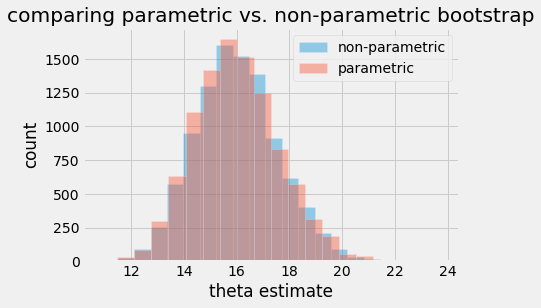

In [80]:
# plot sampling distribution of theta estimated by both non-parametric and parametric bootstrap
plt.hist(np_boot_theta_hat, bins=20, label='non-parametric', alpha=0.4)
plt.hist(boot_theta_hat, bins=20, label='parametric', alpha=0.4)
plt.xlabel('theta estimate')
plt.ylabel('count')
plt.title('comparing parametric vs. non-parametric bootstrap')
plt.legend();

For the true sampling distribution,

$$ \overline{X} = \frac{1}{n} \sum_{i=1}^n X_i \sim N(\mu, 1/n)$$

so the distribution of $\hat{\theta}$ is the distribution of $e^\overline{X}$.  Its CDF is:

$$
\mathbb{P}\left(\hat{\theta} \leq t\right) = 
\mathbb{P}\left(e^\overline{X} \leq t\right) = 
\mathbb{P}\left(\overline{X} \leq \log t\right) = F_{\overline{X}}\left(\log t\right)
$$